In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.nn import Parameter
from torch.autograd import Variable
from torch.sparse import FloatTensor as STensor
from torch.cuda.sparse import FloatTensor as CudaSTensor
from torch.utils.data import Dataset

from datareader import ShotsDataset

In [44]:
%matplotlib notebook
import matplotlib.pyplot as plt

In [15]:
import os
ckpt_d = "/tmp/stephan/logs/multires_2m_0.25/1/ckpt/"
ckpt = os.listdir(ckpt_d)

In [17]:
ckpt = ckpt[0]
ckpt

'ckpt_step-7200.pth.tar'

In [18]:
checkpoint = torch.load(os.path.join(ckpt_d, ckpt))
# start_epoch = checkpoint['epoch']
# best_prec1 = checkpoint['best_prec1']
# model.load_state_dict(checkpoint['state_dict'])

In [22]:
checkpoint.keys()

odict_keys(['_F', '_b'])

In [27]:
_F = checkpoint['_F'].cpu().numpy()

In [28]:
_F.shape

(439, 80, 145)

In [29]:
import numpy as np
import tensorly as tl
from tensorly.decomposition import parafac
from tensorly.decomposition import tucker

tl.set_backend("numpy")

def get_parafac(t, cp_rank):
	factors = parafac(t, rank=cp_rank, init='random', tol=1e-6)
	return factors

def get_tucker(t, tucker_rank):
	random_state = 12345
	core, tucker_factors = tucker(t,
		ranks=tucker_rank,
		init='random',
		tol=10e-5,
		random_state=random_state)
	return core, tucker_factors

Using mxnet backend.
Using numpy backend.


In [58]:
factors = parafac(_F, rank=10, init='svd', tol=1e-8)

In [59]:
print([i.shape for i in factors])

[(439, 10), (80, 10), (145, 10)]


latent 0


<IPython.core.display.Javascript object>


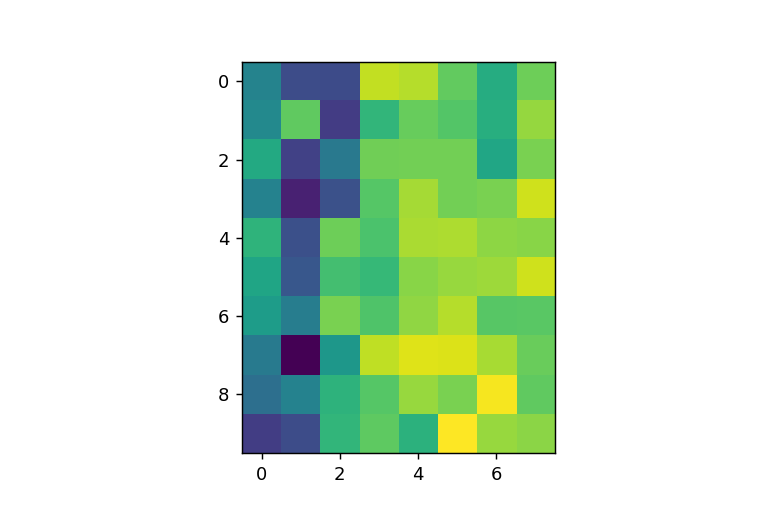

latent 1


<IPython.core.display.Javascript object>


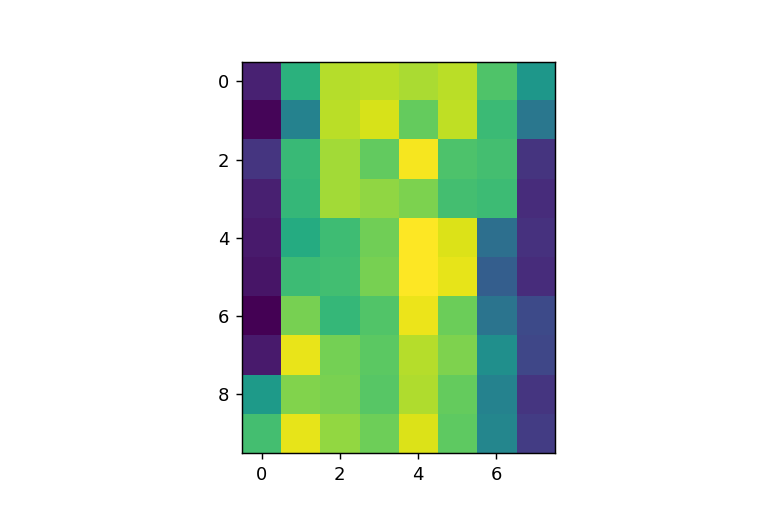

latent 2


<IPython.core.display.Javascript object>


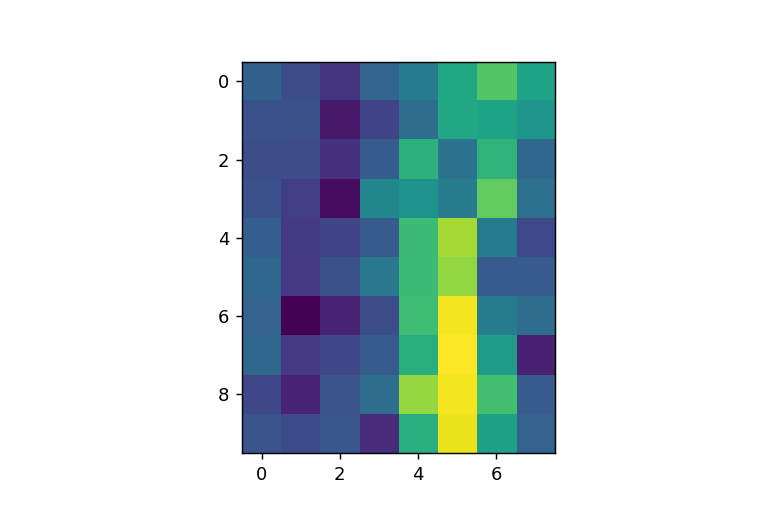

latent 3


<IPython.core.display.Javascript object>


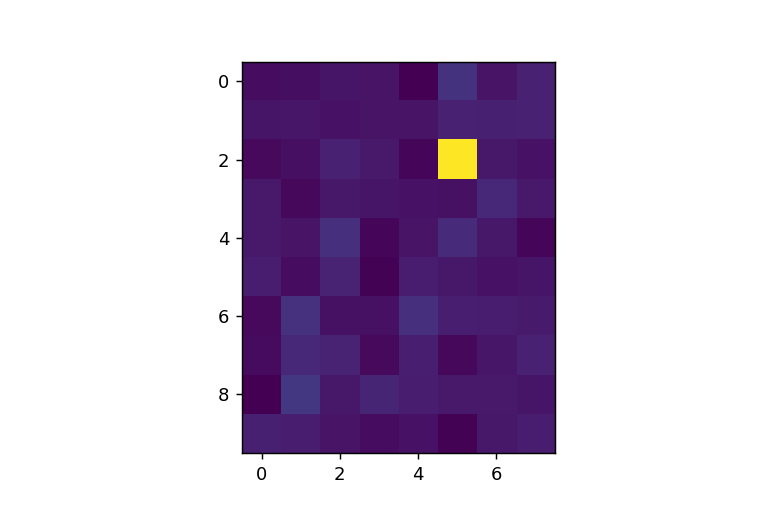

latent 4


<IPython.core.display.Javascript object>


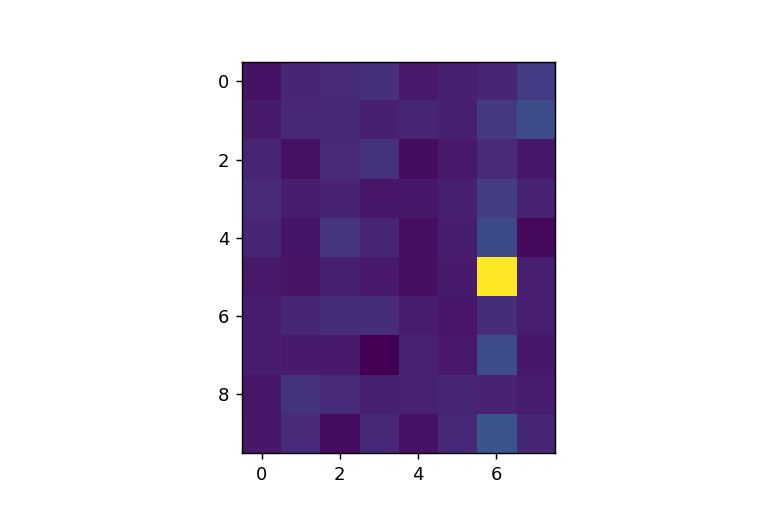

latent 5


<IPython.core.display.Javascript object>


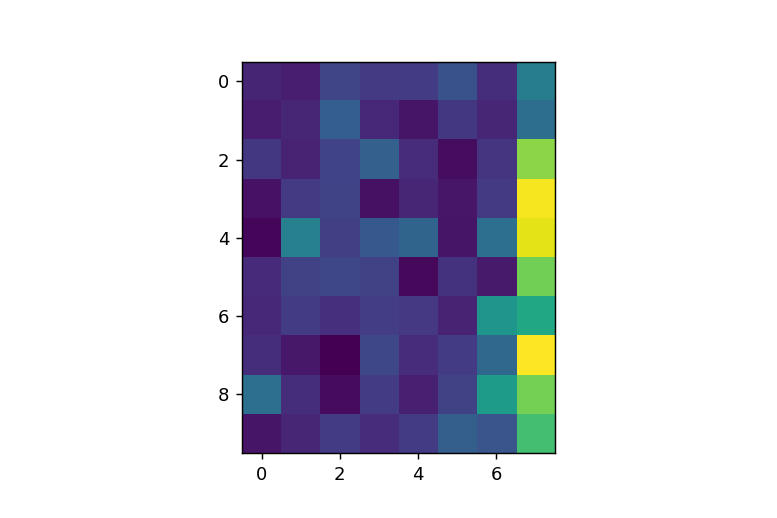

latent 6


<IPython.core.display.Javascript object>


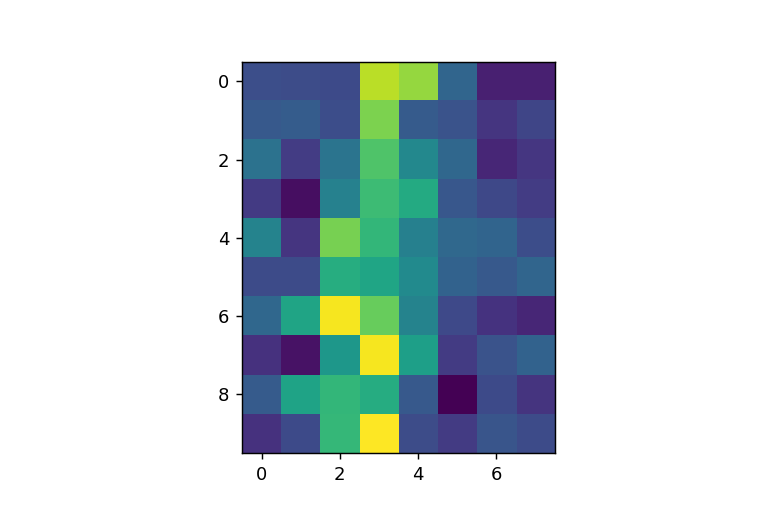

latent 7


<IPython.core.display.Javascript object>


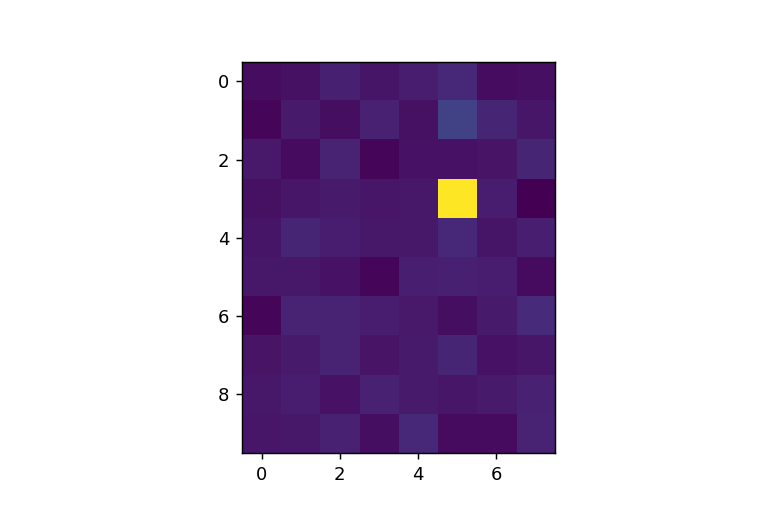

latent 8


<IPython.core.display.Javascript object>


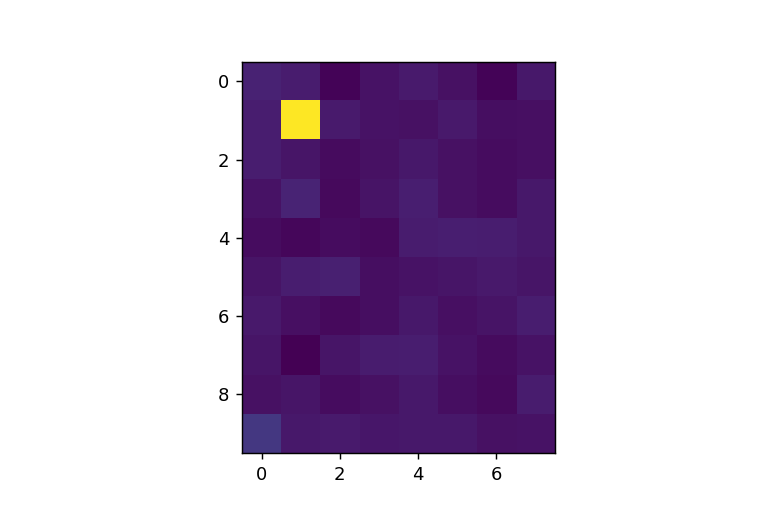

latent 9


<IPython.core.display.Javascript object>


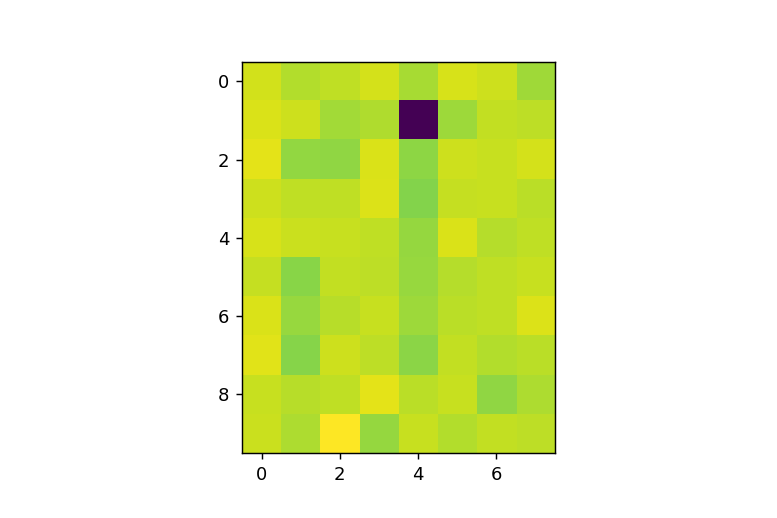

In [62]:
ranks = 10
for k in range(ranks):
  _B = factors[1][:,k].reshape((8,10)).transpose()
  print("latent",k)
  plt.figure()
  plt.imshow(_B)